# Testing displacement estimates using correlation between two images
### Import some libs

In [1]:
%matplotlib notebook
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
from PIL import Image

## Load the data

In [2]:
images_filename_1 = 'data/stitch_image_01.tiff'
images_filename_2 = 'data/stitch_image_02.tiff'

In [3]:
a = np.array(Image.open(images_filename_1))
b = np.array(Image.open(images_filename_2))

<IPython.core.display.Javascript object>


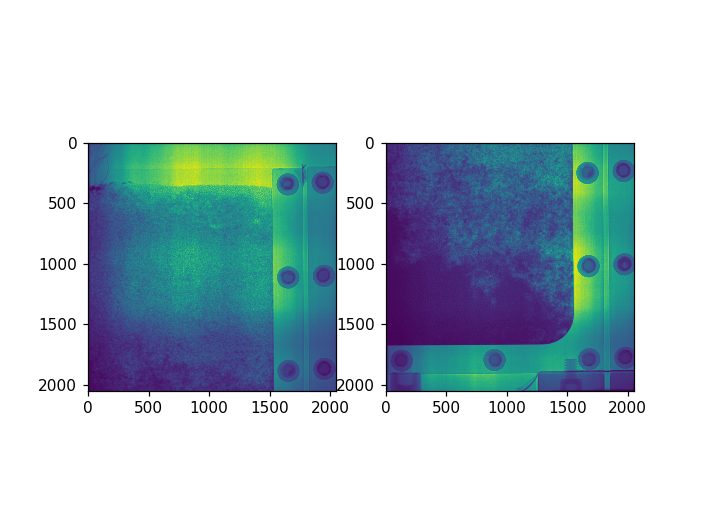

(<matplotlib.axes._subplots.AxesSubplot at 0x1c1af76cf8>,
 <matplotlib.image.AxesImage at 0x1c1b411e48>)

In [4]:
plt.subplot(1,2,1), plt.imshow(a)
plt.subplot(1,2,2), plt.imshow(b)

## Narrow down the search region

In [5]:
x0=1541; y0=1782
width=1753-1541
height=1987-1782

region_a = a[y0:y0+height, x0:x0+width]

x1=1561; y1=151
region_b = b[y1:y1+height, x1:x1+width]

<IPython.core.display.Javascript object>


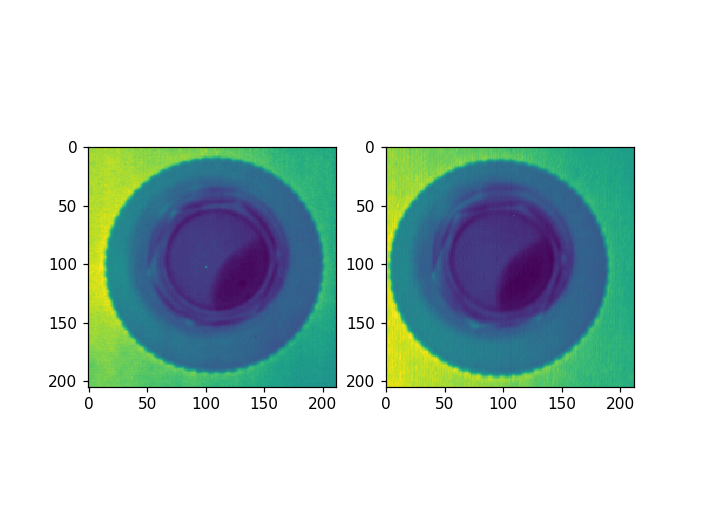

(<matplotlib.axes._subplots.AxesSubplot at 0x1085ea518>,
 <matplotlib.image.AxesImage at 0x10a78e160>)

In [6]:
plt.figure()
plt.subplot(1,2,1), plt.imshow(region_a)
plt.subplot(1,2,2), plt.imshow(region_b)

## Correlation calculation
- Compute the 2D FFT of the two images (they have to be the same size)
- Compute $\mathcal{F}\{corr\}=\mathcal{F}\{a\} * \mathcal{F}\{b\}^*$
- Compute corr=$|\mathcal{F}^{-1}\{\mathcal{F}\{corr\}\}|$

In [12]:
fa=np.fft.fft2(region_a);
fb=np.fft.fft2(region_b);

f=fa*np.conjugate(fb);
co=np.abs(np.fft.ifft2(f));

<IPython.core.display.Javascript object>


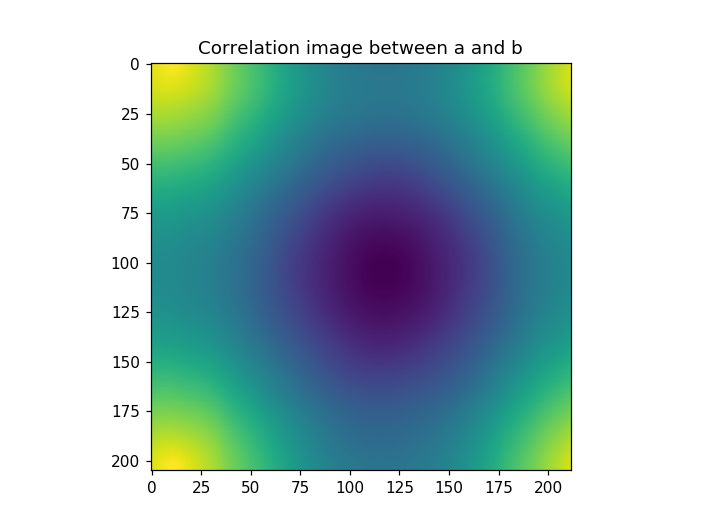

In [13]:
plt.figure()
plt.imshow(np.abs(co))
plt.title('Correlation image between a and b');

## Find the displacement
Locate the max location in $corr$.

In [18]:
pos = np.where(co == np.amax(co))


In [19]:
print("pos of max: {}".format(pos))

pos of max: (array([203]), array([11]))


This is a pretty coarse way to find the local max that could be improved, but is what I could provide as Friday afternoon playing :-)

Ideally, you should probably also do fft shift to center the peak in the middle.

In [25]:
(image_height, image_width) = np.shape(region_b)
new_region_b = np.zeros((height, width+11))

In [26]:
new_region_b[:image_height, 11:11+image_width] = region_b

<IPython.core.display.Javascript object>


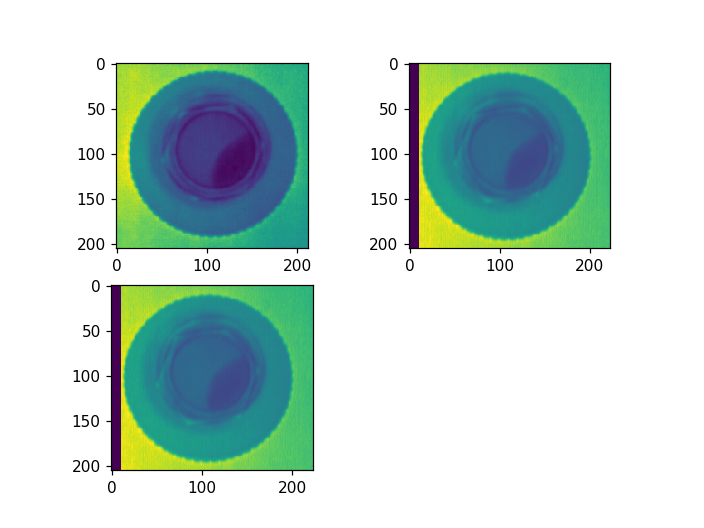

(<matplotlib.axes._subplots.AxesSubplot at 0x1c1e259160>,
 <matplotlib.image.AxesImage at 0x1c1e344cc0>)

In [28]:
plt.figure()
plt.subplot(2,2,1), plt.imshow(region_a)
plt.subplot(2,2,2), plt.imshow(new_region_b)
plt.subplot(2,2,3), plt.imshow(new_region_b)